# OpenCV - Image Processing

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

## Version

In [3]:
print(cv2.__version__)

4.1.0


## Images

(400, 248, 3)


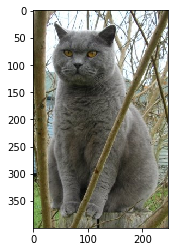

In [4]:
image = cv2.imread('../images/cat.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
print(image.shape)

## Gray-scale Image

(400, 248)


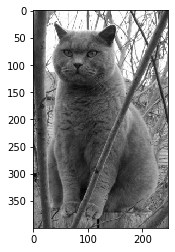

In [5]:
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
print(gray_image.shape)

## Resizing

(50, 30, 3)


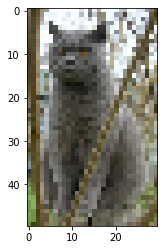

In [5]:
smaller_image = cv2.resize(image, (30, 50), interpolation=cv2.INTER_LINEAR) 
plt.imshow(smaller_image)
print(smaller_image.shape)

## Translation

$$
\begin{pmatrix} x_{new} \\ y_{new} \end{pmatrix}
=
\begin{pmatrix} 1 & 0 & x_t \\ 0 & 1 & y_t \end{pmatrix}
\begin{pmatrix} x_{old} \\ y_{old} \\ 1 \end{pmatrix}
$$

[[  1.   0.  50.]
 [  0.   1. -80.]]


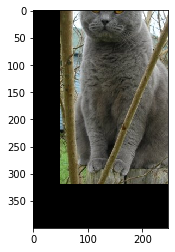

In [6]:
rows, cols, channel = image.shape
translation_matrix = np.float32([[1,0,50], [0,1,-80]])
translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
plt.imshow(translated_image)
print(translation_matrix)

## Rotation

$$
\begin{aligned}
\begin{pmatrix} x_{new} \\ y_{new} \end{pmatrix} &=
\begin{pmatrix}
\alpha & \beta & (1-\alpha) \cdot c_x - \beta \cdot c_y \\
-\beta & \alpha & \beta \cdot c_x + (1-\alpha) \cdot c_y 
\end{pmatrix}
\begin{pmatrix} x_{old} \\ y_{old} \\ 1 \end{pmatrix} \\
\alpha &= scale \times \cos \theta \\
\beta &= scale \times \sin \theta
\end{aligned}
$$
- See https://cristianpb.github.io/blog/image-rotation-opencv for more information.

[[   0.70710678    0.70710678 -105.1025971 ]
 [  -0.70710678    0.70710678  146.25988463]]


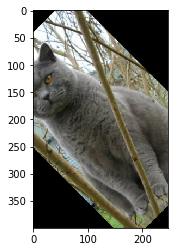

In [7]:
rows, cols, channel = image.shape
rotation_matrix = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
plt.imshow(rotated_image)
print(rotation_matrix)

### Calculation of rotation matrix 

In [8]:
import math

scale = 1.0
theta = 45 / 180 * math.pi
alpha = scale * math.cos(theta)
beta = scale * math.sin(theta)

In [9]:
print(np.array([[alpha, beta, (1 - alpha) * cols / 2 - beta * rows / 2],
                [-beta, alpha, beta * cols / 2 + (1 - alpha) * rows / 2]]))

[[   0.70710678    0.70710678 -105.1025971 ]
 [  -0.70710678    0.70710678  146.25988463]]


## Affine Transformation

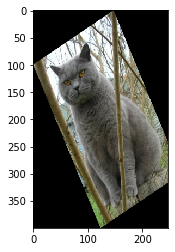

In [10]:
pts1 = np.float32([[0, 0], [cols, 0], [0, rows]])
pts2 = np.float32([[0, 100], [cols-100, 0], [cols/2, rows]])
affine_matrix = cv2.getAffineTransform(pts1,pts2)
affined_image = cv2.warpAffine(image, affine_matrix, (cols, rows))
_ = plt.imshow(affined_image)

## Perspective Transformation

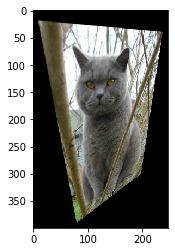

In [11]:
pts1 = np.float32([[0, 0], [cols, 0], [0, rows], [cols, rows]])
pts2 = np.float32([[10, 20], [cols-10, 40], [80, rows-10], [cols-50, rows-100]])
perspective_matrix = cv2.getPerspectiveTransform(pts1, pts2)
perspective_image = cv2.warpPerspective(image, perspective_matrix, (cols, rows))
_ = plt.imshow(perspective_image)

## Image Thresholding

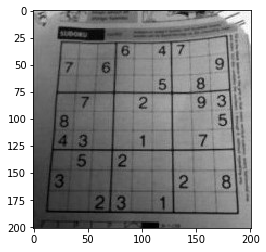

In [2]:
image = cv2.imread('../images/sudoku.jpg')
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_ = plt.imshow(image, cmap='gray')

### Simple Thresholding

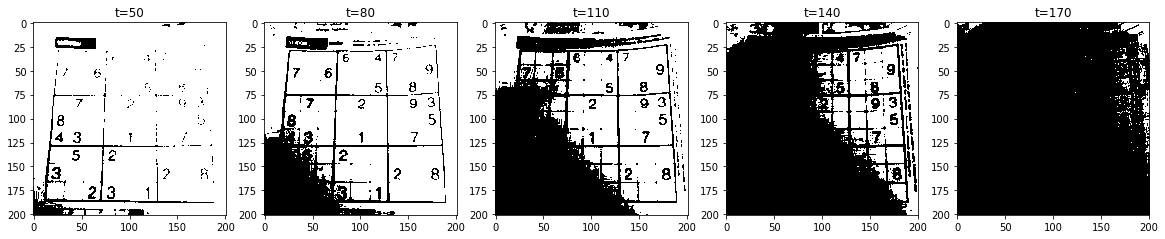

In [13]:
plt.figure(figsize=(20, 5))
for i, threshold in enumerate(range(50, 200, 30)):
    threshold_value, binarized_image = cv2.threshold(gray_image, threshold, 255, cv2.THRESH_BINARY)
    plt.subplot(1, 5, i + 1)
    plt.title('t=' + str(threshold))
    plt.imshow(binarized_image, cmap='gray')

### Otsu’s Binarization

t = 106.0


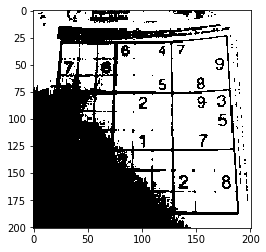

In [14]:
threshold_value, adaptive_3 = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(adaptive_3, cmap='gray')
print('t =', threshold_value)

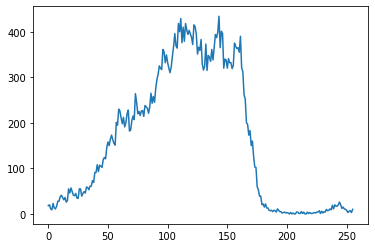

In [15]:
def histogram(image):
    hist = np.zeros(shape=(256,), dtype=np.int32)

    for i in range(256):
        # Get the number of pixels that pixel value is i.
        hist[i] = len(image[image == i])
        
    return hist

plt.plot(list(range(256)), histogram(gray_image))
plt.show()

### Adaptive Thresholding

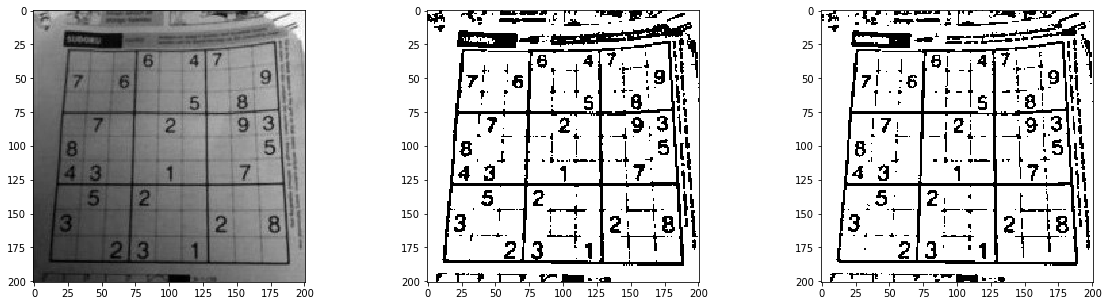

In [16]:
block_size = 21
offset = 10
adaptive_1 = cv2.adaptiveThreshold(gray_image, 255,
                                   cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,
                                   block_size, offset)
adaptive_2 = cv2.adaptiveThreshold(gray_image, 255,
                                   cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,
                                   block_size, offset)
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.subplot(1, 3, 2)
plt.imshow(adaptive_1, cmap='gray')
plt.subplot(1, 3, 3)
_ = plt.imshow(adaptive_2, cmap='gray')

## Image Blurring

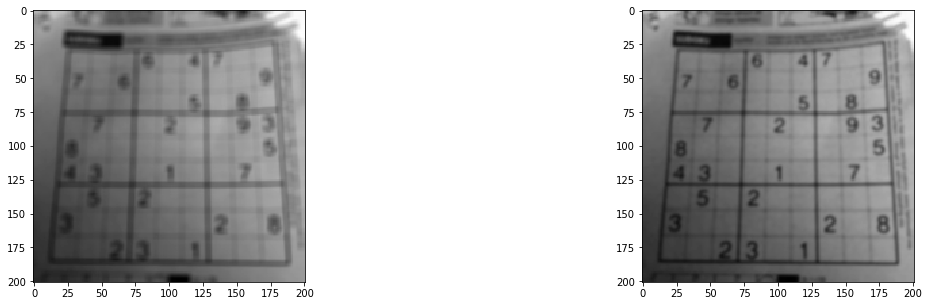

In [17]:
blurred_image_1 = cv2.blur(gray_image, (5, 5))
blurred_image_2 = cv2.GaussianBlur(gray_image, (5, 5), 0)

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.imshow(blurred_image_1, cmap='gray')
plt.subplot(1, 2, 2)
_ = plt.imshow(blurred_image_2, cmap='gray')

## Morphological Transformations

In [19]:
kernel = np.ones((5, 5), np.uint8)
mask_image = cv2.imread('../images/mask_1.png')
mask_image = cv2.cvtColor(mask_image, cv2.COLOR_BGR2GRAY)
_, mask_image = cv2.threshold(mask_image, 250, 255, cv2.THRESH_BINARY)

eroded_image = cv2.erode(mask_image, kernel, iterations = 1)
dilated_image = cv2.dilate(mask_image, kernel, iterations = 1)
opened_image = cv2.morphologyEx(mask_image, cv2.MORPH_OPEN, kernel)
closed_image = cv2.morphologyEx(mask_image, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=(20, 10))

title = ['Original image', 'Eroded image', 'Dilated image', None, 'Eroded & dilated image', 'Dilated & eroded image']
images = [mask_image, eroded_image, dilated_image, None, opened_image, closed_image]

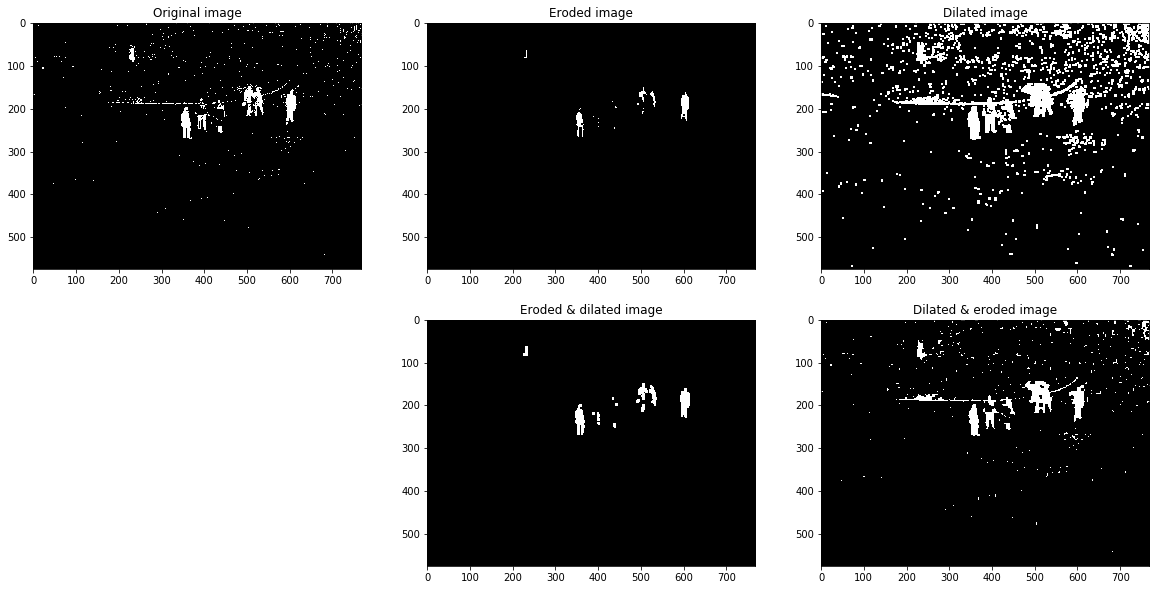

In [19]:
for i in range(6):
    if title[i] is not None:
        plt.subplot(2, 3, i + 1)
        plt.title(title[i])
        plt.imshow(images[i], cmap='gray')

## Image Gradients

$$
kernel_{laplacian} = \begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{bmatrix},\quad \\
kernel^x_{sobel} = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix},\quad \\
kernel^y_{sobel} = \begin{bmatrix} 1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & -2 & -1 \end{bmatrix}.
$$

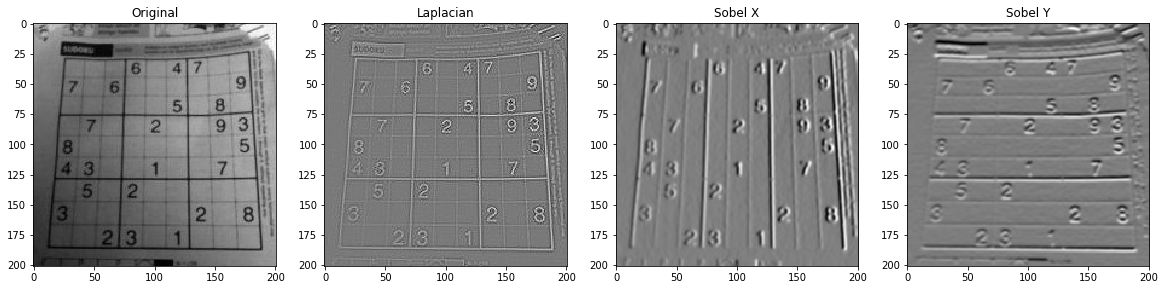

In [20]:
laplacian = cv2.Laplacian(gray_image, cv2.CV_32F)
sobel_x = cv2.Sobel(gray_image, cv2.CV_32F, 1, 0, ksize=5)
sobel_y = cv2.Sobel(gray_image, cv2.CV_32F, 0, 1, ksize=5)

images = [gray_image, laplacian, sobel_x, sobel_y]
titles = ['Original', 'Laplacian', 'Sobel X', 'Sobel Y']
plt.figure(figsize=(20, 5))

for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])

plt.show()

## Convolution ($\simeq$ Correlation)

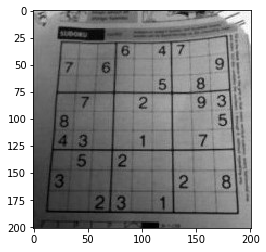

In [27]:
image = cv2.imread('../images/sudoku.jpg')
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_ = plt.imshow(image, cmap='gray')

In [129]:
def plot_convolved_image(original, convolved):
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.imshow(original, cmap='gray')
    plt.title('Original image')
    plt.subplot(122)
    plt.imshow(convolved, cmap='gray')
    plt.title('Convolved image')
    plt.show()

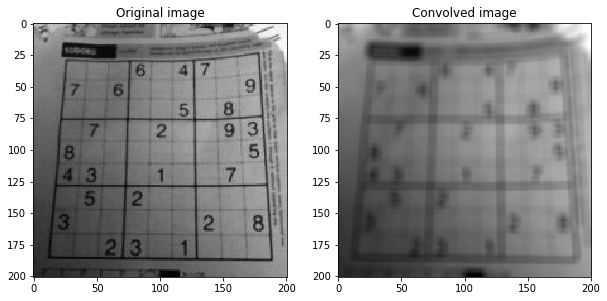

In [130]:
smoothing_kernel = np.ones((7, 7), np.float32) / 49
convolved_image = cv2.filter2D(gray_image, ddepth=-1, kernel=smoothing_kernel)
plot_convolved_image(gray_image, convolved_image)

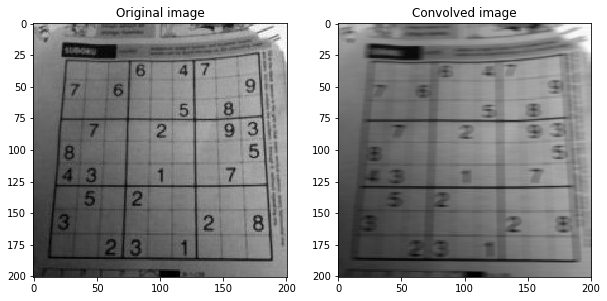

In [131]:
horizontal_smoothing_kernel = np.zeros((7, 7), np.float32)
horizontal_smoothing_kernel[2, :] = 1 / 7
convolved_image = cv2.filter2D(gray_image, ddepth=-1, kernel=horizontal_smoothing_kernel)
plot_convolved_image(gray_image, convolved_image)

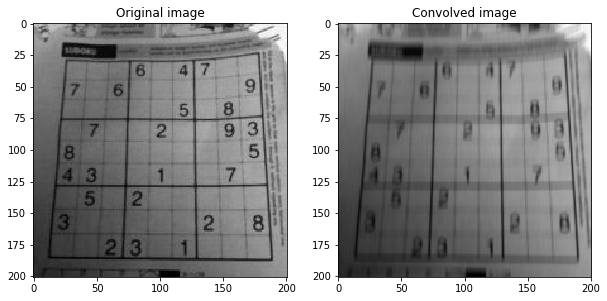

In [132]:
vertical_smoothing_kernel = np.zeros((7, 7), np.float32)
vertical_smoothing_kernel[:, 2] = 1 / 7
convolved_image = cv2.filter2D(gray_image, ddepth=-1, kernel=vertical_smoothing_kernel)
plot_convolved_image(gray_image, convolved_image)

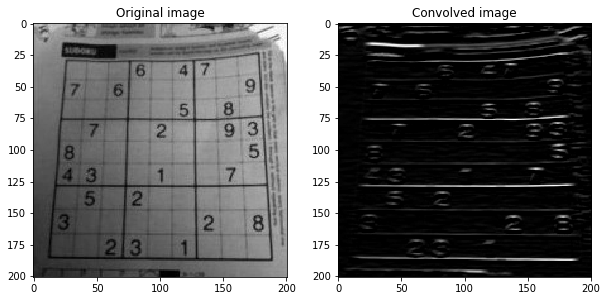

In [133]:
horizontl_edge_kernel = np.zeros((7, 7), np.float32)
horizontl_edge_kernel[1, :] = 1/7
horizontl_edge_kernel[3, :] = -1/7
convolved_image = cv2.filter2D(gray_image, ddepth=-1, kernel=horizontl_edge_kernel)
plot_convolved_image(gray_image, convolved_image)

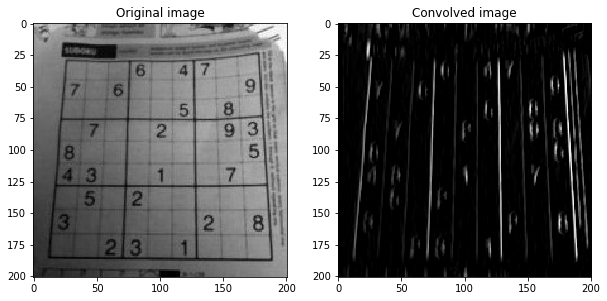

In [134]:
vertical_edge_kernel = np.zeros((7, 7), np.float32)
vertical_edge_kernel[:, 1] = 1/7
vertical_edge_kernel[:, 3] = -1/7
convolved_image = cv2.filter2D(gray_image, ddepth=-1, kernel=vertical_edge_kernel)
plot_convolved_image(gray_image, convolved_image)

#### Self-Implementation

In [144]:
def convolution(image, kernel):
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape
    assert kernel_height % 2 == 1 and kernel_width % 2 == 1
    
    convolved_image = np.zeros(shape=image.shape)
    
    for y in range(image_height - kernel_height + 1):
        for x in range(image_width - kernel_width + 1):
            convolved_image[y+int(kernel_height/2), x+int(kernel_width/2)] \
                = np.sum(image[y:y+kernel_height, x:x+kernel_width] * kernel)
    return np.maximum(convolved_image, 0)

In [136]:
image = np.array(list(range(49))).reshape(7, 7)
kernel = np.array(list(range(9))).reshape(3, 3)
print('image =\n', image)
print('kernel =\n', kernel)
print('image[0:3, 0:3] =\n', image[0:3, 0:3])
print('image[0:3, 0:3] * kernel =\n', image[0:3, 0:3] * kernel)
print('sum(image[0:3, 0:3] * kernel) =\n', np.sum(image[0:3, 0:3] * kernel))
print('convolution =\n', convolution(image, kernel))

image =
 [[ 0  1  2  3  4  5  6]
 [ 7  8  9 10 11 12 13]
 [14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27]
 [28 29 30 31 32 33 34]
 [35 36 37 38 39 40 41]
 [42 43 44 45 46 47 48]]
kernel =
 [[0 1 2]
 [3 4 5]
 [6 7 8]]
image[0:3, 0:3] =
 [[ 0  1  2]
 [ 7  8  9]
 [14 15 16]]
image[0:3, 0:3] * kernel =
 [[  0   1   4]
 [ 21  32  45]
 [ 84 105 128]]
sum(image[0:3, 0:3] * kernel) =
 420
convolution =
 [[   0.    0.    0.    0.    0.    0.    0.]
 [   0.  420.  456.  492.  528.  564.    0.]
 [   0.  672.  708.  744.  780.  816.    0.]
 [   0.  924.  960.  996. 1032. 1068.    0.]
 [   0. 1176. 1212. 1248. 1284. 1320.    0.]
 [   0. 1428. 1464. 1500. 1536. 1572.    0.]
 [   0.    0.    0.    0.    0.    0.    0.]]


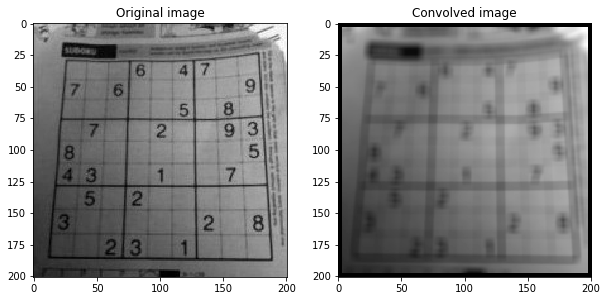

In [137]:
convolved_image = convolution(gray_image, smoothing_kernel)
plot_convolved_image(gray_image, convolved_image)

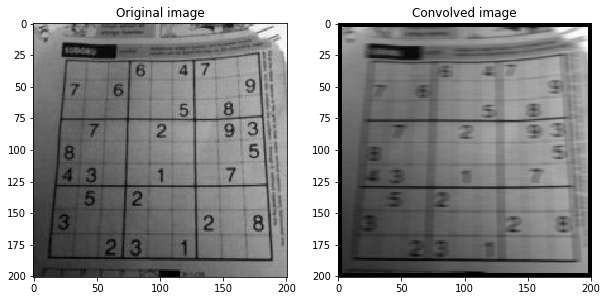

In [138]:
convolved_image = convolution(gray_image, horizontal_smoothing_kernel)
plot_convolved_image(gray_image, convolved_image)

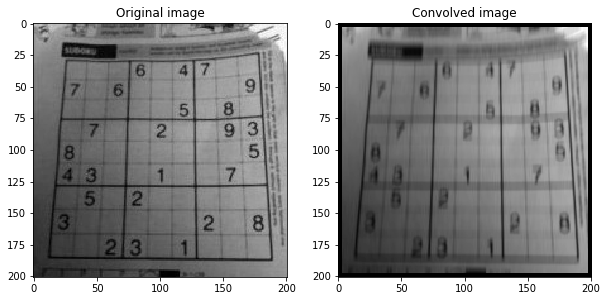

In [139]:
convolved_image = convolution(gray_image, vertical_smoothing_kernel)
plot_convolved_image(gray_image, convolved_image)

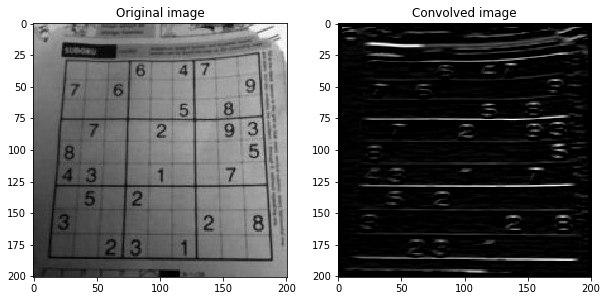

In [140]:
convolved_image = convolution(gray_image, horizontl_edge_kernel)
plot_convolved_image(gray_image, convolved_image)

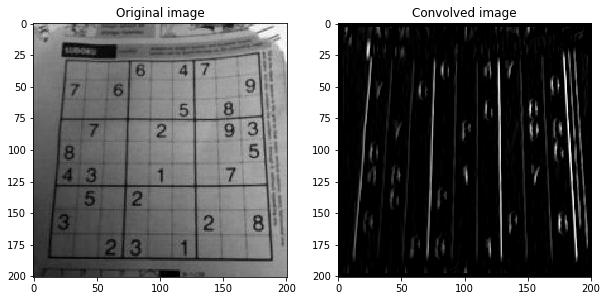

In [141]:
convolved_image = convolution(gray_image, vertical_edge_kernel)
convolved_image = np.maximum(convolved_image, 0)
plot_convolved_image(gray_image, convolved_image)

## Reference
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html
- https://github.com/todddangerfarr/intro-to-computer-vision-with-python-opencv/tree/master/02%20Lecture%20Slides